In [ ]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
! pip install gower
import gower
! pip install umap-learn
import umap

  Created wheel for gower: filename=gower-0.0.5-py3-none-any.whl size=4231 sha256=334944363b4c81e55665a93efdf2eb6b549475f7b29081ff0f897b9af161d495
  Stored in directory: /root/.cache/pip/wheels/3e/f9/9a/67122a959a424e9cbb4557a8366c871a30e31cd75f0d003db4
Successfully built gower
     |████████████████████████████████| 86 kB 3.6 MB/s 
     |████████████████████████████████| 1.1 MB 19.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=6ff20ad766baa0521ff77b9286ae8cd7c499df03361f07613c4c407fb3caf1f5
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=03c7134543f05bce46a4761561ad5d2752e3ba341746787529a5b55ddc2ae827
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/CS 5112 Final Project/Code/k-proto data/okcupid-kproto-10k.csv')
display(df)

,Unnamed: 0,Unnamed: 0.1,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,job,location,sign,smokes,arabic,chinese,english,german,hindi,italian,japanese,korean,portuguese,russian,spanish,turkish,has kids,wants kids,likes dogs,likes cats,new_religion
0,12329,35185,38,single,m,straight,5,anything,2,never,graduated from college/university,asian,67.0,political / government,A,whatever,no,no,yes,yes,no,no,no,no,no,no,no,no,no,no,no,yes,yes,other
1,811,2193,31,single,f,gay,3,anything,2,never,graduated from college/university,mixed,62.0,other,A,whatever,yes,no,no,yes,no,no,no,yes,no,no,no,no,no,no,no,no,yes,Tatheism
2,8173,23402,43,single,f,straight,3,vegetarian,2,never,graduated from college/university,mixed,67.0,education / academia,A,whatever,no,no,no,yes,no,no,no,no,no,no,no,yes,no,no,yes,yes,yes,judaism
3,6505,18557,24,single,m,straight,5,anything,2,never,graduated from college/university,white,70.0,science / tech / engineering,A,whatever,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,yes,no,none
4,4106,11716,22,single,f,gay,4,anything,2,never,working on college/university,white,65.0,other,A,whatever,no,no,no,yes,no,no,no,no,no,no,no,yes,no,no,no,no,no,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12980,37014,21,single,f,straight,4,anything,1,never,working on college/university,white,65.0,student,A,whatever,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes,yes,no,christianity
9996,17296,49630,28,single,f,straight,5,vegetarian,2,never,graduated from college/university,white,65.0,science / tech / engineering,A,whatever,no,no,no,yes,no,no,no,no,no,no,no,yes,no,no,no,yes,no,agnosticism
9997,18783,54044,24,single,m,straight,4,vegetarian,2,never,working on college/university,mixed,70.0,unemployed,A,whatever,trying to quit,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,yes,yes,other
9998,2912,8178,41,single,f,straight,1,anything,2,never,graduated from college/university,white,61.0,other,A,does_not_matter,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,yes,no,other


Index(['Unnamed: 0', 'Unnamed: 0.1', 'age', 'status', 'sex', 'orientation',
       'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'job', 'location', 'sign', 'smokes', 'arabic', 'chinese',
       'english', 'german', 'hindi', 'italian', 'japanese', 'korean',
       'portuguese', 'russian', 'spanish', 'turkish', 'has kids', 'wants kids',
       'likes dogs', 'likes cats', 'new_religion'],
      dtype='object')


Text(0.5, 1.0, 'Height')

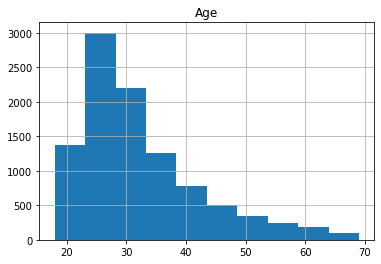

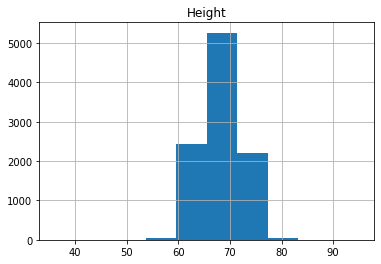

In [ ]:
print(df.columns)
plt.figure()
df['age'].hist()
plt.title("Age")
plt.figure()
df['height'].hist()
plt.title("Height")

In [ ]:
# dropping rows where the person is married, unknown or seeing someone for simplicity
df = df[df['status'] != "married"]
df = df[df['status'] != "unknown"]
df = df[df['status'] != "seeing someone"]

# dropping status, sex and orientation
df = df.drop(['status', 'sex', 'orientation', 'Unnamed: 0.1', 'Unnamed: 0', 'location'], axis = 1)

In [ ]:
print(df.columns)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'job', 'sign', 'smokes', 'arabic', 'chinese', 'english',
       'german', 'hindi', 'italian', 'japanese', 'korean', 'portuguese',
       'russian', 'spanish', 'turkish', 'has kids', 'wants kids', 'likes dogs',
       'likes cats', 'new_religion'],
      dtype='object')


In [ ]:
dist_matrix = gower.gower_matrix(df)

In [ ]:
print(dist_matrix)
print(np.shape(dist_matrix))

[[0.         0.27221432 0.26778713 ... 0.23304847 0.21287566 0.1962636 ]
 [0.27221432 0.         0.2971443  ... 0.26688743 0.27189383 0.25452214]
 [0.26778713 0.2971443  0.         ... 0.23654987 0.30503252 0.25690785]
 ...
 [0.23304847 0.26688743 0.23654987 ... 0.         0.2887813  0.26656696]
 [0.21287566 0.27189383 0.30503252 ... 0.2887813  0.         0.12935717]
 [0.1962636  0.25452214 0.25690785 ... 0.26656696 0.12935717 0.        ]]
(9701, 9701)


In [ ]:
neigh = NearestNeighbors(n_neighbors=50, metric="precomputed")
neigh.fit(dist_matrix)

neighbor_matrix = neigh.kneighbors_graph(mode="distance")
print(neighbor_matrix)

  (0, 8781)	0.050690785
  (0, 5700)	0.068252385
  (0, 7460)	0.07455016
  (0, 1930)	0.07483502
  (0, 7944)	0.07744623
  (0, 4967)	0.07824147
  (0, 2551)	0.07884679
  (0, 2050)	0.0790367
  (0, 2456)	0.0790367
  (0, 6376)	0.079131655
  (0, 4759)	0.07973698
  (0, 468)	0.080532216
  (0, 6456)	0.08113754
  (0, 1099)	0.08113754
  (0, 5436)	0.081232496
  (0, 3262)	0.08164791
  (0, 243)	0.08174287
  (0, 9140)	0.081882924
  (0, 5946)	0.081932776
  (0, 3276)	0.08225324
  (0, 496)	0.08225324
  (0, 8958)	0.08244315
  (0, 8949)	0.08290367
  (0, 3023)	0.08295352
  (0, 4606)	0.082998626
  :	:
  (9700, 2109)	0.042337272
  (9700, 4991)	0.042337272
  (9700, 4602)	0.042337272
  (9700, 3205)	0.042942602
  (9700, 9163)	0.04392774
  (9700, 3668)	0.045138393
  (9700, 1950)	0.04564877
  (9700, 3613)	0.04626359
  (9700, 1203)	0.046444003
  (9700, 6759)	0.046679012
  (9700, 6394)	0.04704933
  (9700, 1301)	0.047524095
  (9700, 8929)	0.047759105
  (9700, 180)	0.04849499
  (9700, 2988)	0.048779853
  (9700, 7761)	0.

In [ ]:
print(neighbor_matrix.toarray())
print(len(neighbor_matrix.toarray()))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
9701


In [ ]:
# convert to pandas df
neighbors_df = pd.DataFrame(neighbor_matrix.toarray())
display(neighbors_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9661,9662,9663,9664,9665,9666,9667,9668,9669,9670,9671,9672,9673,9674,9675,9676,9677,9678,9679,9680,9681,9682,9683,9684,9685,9686,9687,9688,9689,9690,9691,9692,9693,9694,9695,9696,9697,9698,9699,9700
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.079877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.079348,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# finding which people the first person was matched with
np.nonzero(np.array(neighbors_df.iloc[0]))

(array([  97,  243,  275,  468,  496,  878,  965, 1099, 1352, 1649, 1930,
        2050, 2099, 2343, 2456, 2551, 2838, 3007, 3023, 3262, 3276, 3944,
        4087, 4160, 4210, 4557, 4606, 4759, 4967, 5002, 5436, 5700, 5829,
        5946, 6035, 6174, 6376, 6456, 6667, 7460, 7629, 7669, 7944, 8059,
        8475, 8781, 8949, 8958, 9140, 9321]),)

In [ ]:
df.to_csv('cleaned_ds.csv')

In [ ]:
print(np.array(neighbors_df.iloc[0])[3007])

0.099859945


# Add column for 50 NN for each row

In [ ]:
NN = []
for x in range(neighbors_df.shape[0]):
  NN.append(np.nonzero(np.array(neighbors_df.iloc[x])))

In [ ]:
len(NN)

9701

In [ ]:
df_k = df.copy()

In [ ]:
df_k['NN'] = NN

In [ ]:
df_k['NN'][0]

(array([  97,  243,  275,  468,  496,  878,  965, 1099, 1352, 1649, 1930,
        2050, 2099, 2343, 2456, 2551, 2838, 3007, 3023, 3262, 3276, 3944,
        4087, 4160, 4210, 4557, 4606, 4759, 4967, 5002, 5436, 5700, 5829,
        5946, 6035, 6174, 6376, 6456, 6667, 7460, 7629, 7669, 7944, 8059,
        8475, 8781, 8949, 8958, 9140, 9321]),)

In [ ]:
df_k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9701 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           9701 non-null   int64  
 1   body_type     9701 non-null   int64  
 2   diet          9701 non-null   object 
 3   drinks        9701 non-null   int64  
 4   drugs         9701 non-null   object 
 5   education     9701 non-null   object 
 6   ethnicity     9701 non-null   object 
 7   height        9701 non-null   float64
 8   job           9701 non-null   object 
 9   sign          9701 non-null   object 
 10  smokes        9701 non-null   object 
 11  arabic        9701 non-null   object 
 12  chinese       9701 non-null   object 
 13  english       9701 non-null   object 
 14  german        9701 non-null   object 
 15  hindi         9701 non-null   object 
 16  italian       9701 non-null   object 
 17  japanese      9701 non-null   object 
 18  korean        9701 non-null 

# Visualize

In [ ]:
#Preprocessing numerical
#numerical = df_k.select_dtypes(exclude='object')
num = ['age', 'body_type', 'drinks', 'height']
numerical = df_k[num]

##preprocessing categorical
categorical = df_k.select_dtypes(include='object').drop(columns='NN')
categorical = pd.get_dummies(categorical)

In [ ]:
#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(df_k.select_dtypes(include='object').columns) / df.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2', random_state=42).fit(numerical)
fit2 = umap.UMAP(metric='dice', random_state=42).fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.umap_.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.umap_.reset_local_connectivity(intersection)
embedding = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1._initial_alpha, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random.RandomState(seed=42), fit1.metric, 
                                                fit1._metric_kwds, False, fit1._densmap_kwds, fit1.output_dens)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1804: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


In [ ]:
x = embedding[0][:, 0]
y = embedding[0][:, 1]

In [ ]:
x

array([ 1.8182468 ,  6.064453  ,  1.8570495 , ..., -0.23346773,
        8.985125  ,  5.7332335 ], dtype=float32)

In [ ]:
np.take(x, [df_k['NN'][0]])

array([[[-0.7579434 ,  2.088918  ,  1.9429356 ,  2.004038  ,
          2.0239828 , -1.3616009 ,  1.8682848 , -1.0827918 ,
          2.0123305 ,  2.1706648 ,  1.8969737 ,  2.1667345 ,
          1.9864889 ,  1.4809062 ,  3.0316732 ,  1.9502342 ,
         -0.9376305 ,  1.9295931 ,  2.2648706 ,  1.905722  ,
          2.193617  ,  2.1352603 ,  2.1828325 , -1.0665946 ,
          2.989067  ,  2.1819596 ,  1.9395765 ,  2.111935  ,
          2.1395435 ,  1.8915546 ,  1.4559062 ,  1.9654388 ,
         -0.97631687, -0.61929977,  2.0228465 ,  2.1139772 ,
          2.1897697 ,  2.1473908 ,  1.8613694 ,  2.0180888 ,
          1.9663197 ,  1.9346389 ,  2.2087924 ,  2.931544  ,
          2.2073584 ,  1.8897327 ,  2.185415  ,  2.0407991 ,
          1.9925705 ,  1.9409963 ]]], dtype=float32)

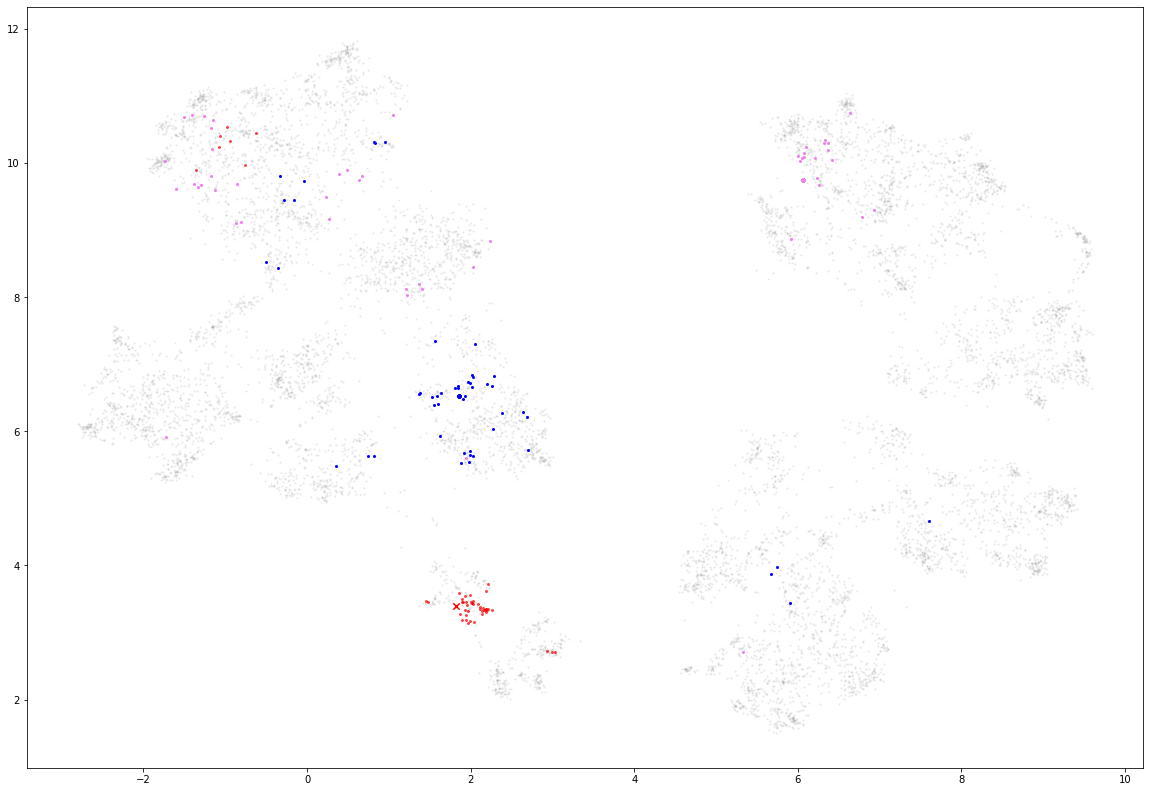

In [ ]:
plt.figure(figsize=(20, 14))
plt.scatter(x, y, s=2, alpha=0.1, c='grey')
#plt.scatter(embedding[0][:200, 0], embedding[0][:200, 1], s=4, c='red') # Pick 200 points to highlight
# Figure out how to color the NN for each of these points on the plot 
plt.scatter(x[0], y[0], s=40, c='red', marker='x')
plt.scatter(np.take(x, [df_k['NN'][0]]), np.take(y, [df_k['NN'][0]]), s=4, c='red', alpha=0.6)
plt.scatter(x[1], y[1], s=14, c='violet', marker='x')
plt.scatter(np.take(x, [df_k['NN'][1]]), np.take(y, [df_k['NN'][1]]), s=4, c='violet')
plt.scatter(x[2], y[2], s=14, c='blue', marker='x')
plt.scatter(np.take(x, [df_k['NN'][2]]), np.take(y, [df_k['NN'][2]]), s=4, c='blue')
plt.figure(figsize=(20, 14))
plt.scatter(x, y, s=2, alpha=0.1, c='grey')
#plt.scatter(embedding[0][:200, 0], embedding[0][:200, 1], s=4, c='red') # Pick 200 points to highlight
# Figure out how to color the NN for each of these points on the plot 
plt.scatter(x[0], y[0], s=40, c='red', marker='x')
plt.scatter(np.take(x, [df_k['NN'][0]]), np.take(y, [df_k['NN'][0]]), s=4, c='red', alpha=0.6)
plt.scatter(x[1], y[1], s=14, c='violet', marker='x')
plt.scatter(np.take(x, [df_k['NN'][1]]), np.take(y, [df_k['NN'][1]]), s=4, c='violet')
plt.scatter(x[2], y[2], s=14, c='blue', marker='x')
plt.scatter(np.take(x, [df_k['NN'][2]]), np.take(y, [df_k['NN'][2]]), s=4, c='blue')
plt.scatter 
plt.show()plt.scatter 
plt.show()

In [ ]:
import random
rand_colors = []
for j in range(200):
    rand_colors.append("#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)]))

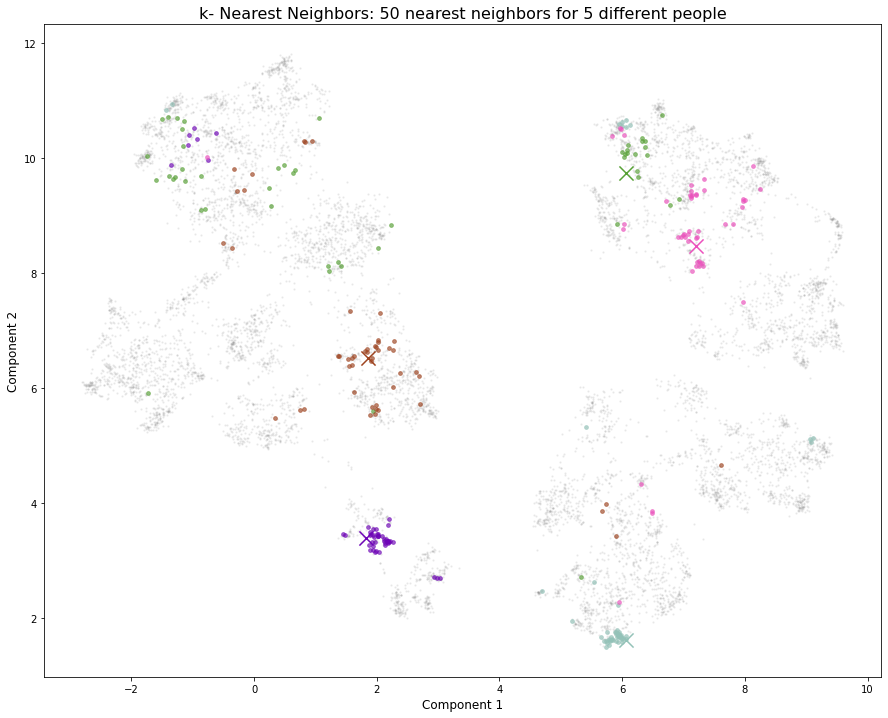

In [ ]:
plt.figure(figsize=(15, 12))
plt.scatter(x, y, s=2, alpha=0.1, c='grey')

for i in range(5):
  #color = plt.cm.get_cmap('hsv', i)
  plt.scatter(x[i], y[i], s=200, c=rand_colors[i], marker='x')
  plt.scatter(np.take(x, [df_k['NN'][i]]), np.take(y, [df_k['NN'][i]]), s=14, c=rand_colors[i], alpha=0.6)
plt.xlabel('Component 1', size=12)
plt.ylabel('Component 2', size=12)
plt.title('k- Nearest Neighbors: 50 nearest neighbors for 5 different people', size=16)
plt.show()